## Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import radians, cos, sin, asin, sqrt
import datetime as dt

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 500)
%matplotlib inline
sns.set()

## Read Data

In [34]:
df_twn_hkg_flights = pd.read_csv('../data/filtered_flights_twn_hkg.csv', index_col=0)

In [37]:
df_twn_hkg_flights['scheduled_departure_dt'] = pd.to_datetime(df_twn_hkg_flights['scheduled_departure_dt'])
df_twn_hkg_flights['scheduled_arrival_dt'] = pd.to_datetime(df_twn_hkg_flights['scheduled_arrival_dt'])
df_twn_hkg_flights['real_departure_dt'] = pd.to_datetime(df_twn_hkg_flights['real_departure_dt'])
df_twn_hkg_flights['estimated_arrival_dt'] = pd.to_datetime(df_twn_hkg_flights['estimated_arrival_dt'])

df_twn_hkg_flights['timestamp_dt'] = pd.to_datetime(df_twn_hkg_flights['timestamp_utc'], unit='s')

In [46]:
data.flight_id.unique()

array(['c0aabc0', 'c0ab750', 'c0ac71c', 'c0b5e1f', 'c0b6e4a', 'c0b7b08',
       'c0b7c01', 'c0b879e', 'c0b881e', 'c0bbcff', 'c0bcd61', 'c0bd528',
       'c0bd9c2', 'c0be08b', 'c0be485', 'c0bf28e', 'c0bf949', 'c0c134a',
       'c0c1558', 'c0c1fa7', 'c0c305b', 'c0c33bf', 'c0c53fa', 'c0c62b0',
       'c0c80fb', 'c0cc705', 'c0d42e6', 'c0d54fb', 'c0d573d', 'c0d59cc',
       'c0d6054', 'c0d698e', 'c0d786a', 'c0d8253', 'c0da2cf', 'c0dcc01',
       'c0dd8eb', 'c0ddac6', 'c0def87', 'c0e0534', 'c0e1a98', 'c0e221e',
       'c0e27aa', 'c0e2861', 'c0e2e53', 'c0e42ae', 'c0e45b9', 'c0e6bf9',
       'c0e71aa', 'c0e8b33', 'c0f7c42', 'c0f9b42', 'c0fa723', 'c0fb7c4',
       'c0fdb7a', 'c0ff2cd', 'c0ffa2a', 'c100607', 'c1011b8', 'c101adc',
       'c102d78', 'c1030a5', 'c103aad', 'c104977', 'c1051bf', 'c105259',
       'c1071c4', 'c108042', 'c108410', 'c108418', 'c10880c', 'c108a12',
       'c109086', 'c10a3f3', 'c10a414', 'c10c1db', 'c10d45d', 'c10e3c6',
       'c10e6bf', 'c10eab3', 'c11064d', 'c11c4e6', 

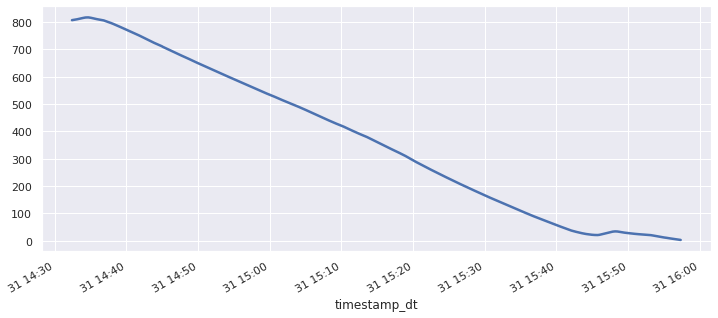

In [47]:
data = df_twn_hkg_flights.copy()
data.set_index('timestamp_dt', inplace=True, drop=True)
# sns.tsplot(df['displacement_to_hkg'], color="indianred")
data.loc[data['flight_id'] == 'c0aabc0', 'displacement_to_hkg'].plot(lw=2.5, figsize=(12,5))

In [61]:
linreg = LinearRegression()
linreg.fit(data.index[data['flight_id'] == 'c0aabc0'],
           data.loc[data['flight_id'] == 'c0aabc0', 'displacement_to_hkg'])

ValueError: Expected 2D array, got 1D array instead:
array=['2016-12-31T14:32:25.000000000' '2016-12-31T14:32:34.000000000'
 '2016-12-31T14:32:50.000000000' '2016-12-31T14:32:56.000000000'
 '2016-12-31T14:33:02.000000000' '2016-12-31T14:33:08.000000000'
 '2016-12-31T14:33:14.000000000' '2016-12-31T14:33:20.000000000'
 '2016-12-31T14:33:26.000000000' '2016-12-31T14:33:32.000000000'
 '2016-12-31T14:33:38.000000000' '2016-12-31T14:33:44.000000000'
 '2016-12-31T14:33:51.000000000' '2016-12-31T14:33:57.000000000'
 '2016-12-31T14:34:03.000000000' '2016-12-31T14:34:09.000000000'
 '2016-12-31T14:34:15.000000000' '2016-12-31T14:34:21.000000000'
 '2016-12-31T14:34:42.000000000' '2016-12-31T14:34:57.000000000'
 '2016-12-31T14:35:03.000000000' '2016-12-31T14:35:13.000000000'
 '2016-12-31T14:35:19.000000000' '2016-12-31T14:35:25.000000000'
 '2016-12-31T14:35:36.000000000' '2016-12-31T14:35:42.000000000'
 '2016-12-31T14:35:52.000000000' '2016-12-31T14:36:08.000000000'
 '2016-12-31T14:36:19.000000000' '2016-12-31T14:36:34.000000000'
 '2016-12-31T14:36:45.000000000' '2016-12-31T14:36:51.000000000'
 '2016-12-31T14:37:18.000000000' '2016-12-31T14:37:37.000000000'
 '2016-12-31T14:37:53.000000000' '2016-12-31T14:38:08.000000000'
 '2016-12-31T14:38:42.000000000' '2016-12-31T14:39:13.000000000'
 '2016-12-31T14:39:44.000000000' '2016-12-31T14:40:45.000000000'
 '2016-12-31T14:41:48.000000000' '2016-12-31T14:42:52.000000000'
 '2016-12-31T14:43:53.000000000' '2016-12-31T14:44:56.000000000'
 '2016-12-31T14:45:06.000000000' '2016-12-31T14:46:36.000000000'
 '2016-12-31T14:47:41.000000000' '2016-12-31T14:48:46.000000000'
 '2016-12-31T14:49:51.000000000' '2016-12-31T14:50:56.000000000'
 '2016-12-31T14:52:01.000000000' '2016-12-31T14:53:06.000000000'
 '2016-12-31T14:54:11.000000000' '2016-12-31T14:55:16.000000000'
 '2016-12-31T14:56:21.000000000' '2016-12-31T14:57:26.000000000'
 '2016-12-31T14:58:31.000000000' '2016-12-31T14:59:36.000000000'
 '2016-12-31T15:00:41.000000000' '2016-12-31T15:01:46.000000000'
 '2016-12-31T15:02:47.000000000' '2016-12-31T15:04:01.000000000'
 '2016-12-31T15:05:03.000000000' '2016-12-31T15:06:06.000000000'
 '2016-12-31T15:07:12.000000000' '2016-12-31T15:08:13.000000000'
 '2016-12-31T15:09:16.000000000' '2016-12-31T15:10:19.000000000'
 '2016-12-31T15:11:23.000000000' '2016-12-31T15:12:31.000000000'
 '2016-12-31T15:13:35.000000000' '2016-12-31T15:13:56.000000000'
 '2016-12-31T15:14:26.000000000' '2016-12-31T15:14:44.000000000'
 '2016-12-31T15:14:50.000000000' '2016-12-31T15:14:56.000000000'
 '2016-12-31T15:15:02.000000000' '2016-12-31T15:15:29.000000000'
 '2016-12-31T15:17:03.000000000' '2016-12-31T15:18:08.000000000'
 '2016-12-31T15:18:56.000000000' '2016-12-31T15:20:27.000000000'
 '2016-12-31T15:21:29.000000000' '2016-12-31T15:22:31.000000000'
 '2016-12-31T15:23:32.000000000' '2016-12-31T15:24:34.000000000'
 '2016-12-31T15:25:35.000000000' '2016-12-31T15:26:38.000000000'
 '2016-12-31T15:27:39.000000000' '2016-12-31T15:28:40.000000000'
 '2016-12-31T15:29:43.000000000' '2016-12-31T15:30:44.000000000'
 '2016-12-31T15:31:47.000000000' '2016-12-31T15:32:49.000000000'
 '2016-12-31T15:33:59.000000000' '2016-12-31T15:35:10.000000000'
 '2016-12-31T15:35:42.000000000' '2016-12-31T15:36:15.000000000'
 '2016-12-31T15:36:48.000000000' '2016-12-31T15:37:21.000000000'
 '2016-12-31T15:37:52.000000000' '2016-12-31T15:38:25.000000000'
 '2016-12-31T15:38:57.000000000' '2016-12-31T15:39:30.000000000'
 '2016-12-31T15:40:02.000000000' '2016-12-31T15:40:35.000000000'
 '2016-12-31T15:41:06.000000000' '2016-12-31T15:41:39.000000000'
 '2016-12-31T15:41:53.000000000' '2016-12-31T15:41:59.000000000'
 '2016-12-31T15:42:05.000000000' '2016-12-31T15:42:11.000000000'
 '2016-12-31T15:42:17.000000000' '2016-12-31T15:42:32.000000000'
 '2016-12-31T15:42:45.000000000' '2016-12-31T15:42:58.000000000'
 '2016-12-31T15:43:10.000000000' '2016-12-31T15:43:22.000000000'
 '2016-12-31T15:43:34.000000000' '2016-12-31T15:43:46.000000000'
 '2016-12-31T15:43:57.000000000' '2016-12-31T15:44:09.000000000'
 '2016-12-31T15:44:21.000000000' '2016-12-31T15:44:33.000000000'
 '2016-12-31T15:44:45.000000000' '2016-12-31T15:44:56.000000000'
 '2016-12-31T15:45:08.000000000' '2016-12-31T15:45:20.000000000'
 '2016-12-31T15:45:32.000000000' '2016-12-31T15:45:44.000000000'
 '2016-12-31T15:45:50.000000000' '2016-12-31T15:45:58.000000000'
 '2016-12-31T15:46:05.000000000' '2016-12-31T15:46:13.000000000'
 '2016-12-31T15:46:19.000000000' '2016-12-31T15:46:25.000000000'
 '2016-12-31T15:46:40.000000000' '2016-12-31T15:46:52.000000000'
 '2016-12-31T15:47:03.000000000' '2016-12-31T15:47:15.000000000'
 '2016-12-31T15:47:27.000000000' '2016-12-31T15:47:39.000000000'
 '2016-12-31T15:47:45.000000000' '2016-12-31T15:47:51.000000000'
 '2016-12-31T15:47:59.000000000' '2016-12-31T15:48:05.000000000'
 '2016-12-31T15:48:11.000000000' '2016-12-31T15:48:31.000000000'
 '2016-12-31T15:48:40.000000000' '2016-12-31T15:48:51.000000000'
 '2016-12-31T15:49:01.000000000' '2016-12-31T15:49:16.000000000'
 '2016-12-31T15:49:31.000000000' '2016-12-31T15:49:46.000000000'
 '2016-12-31T15:50:01.000000000' '2016-12-31T15:50:16.000000000'
 '2016-12-31T15:50:26.000000000' '2016-12-31T15:50:36.000000000'
 '2016-12-31T15:50:46.000000000' '2016-12-31T15:50:56.000000000'
 '2016-12-31T15:51:11.000000000' '2016-12-31T15:51:21.000000000'
 '2016-12-31T15:51:27.000000000' '2016-12-31T15:53:03.000000000'
 '2016-12-31T15:53:09.000000000' '2016-12-31T15:53:16.000000000'
 '2016-12-31T15:53:22.000000000' '2016-12-31T15:53:28.000000000'
 '2016-12-31T15:53:34.000000000' '2016-12-31T15:53:40.000000000'
 '2016-12-31T15:53:46.000000000' '2016-12-31T15:53:53.000000000'
 '2016-12-31T15:54:02.000000000' '2016-12-31T15:54:08.000000000'
 '2016-12-31T15:54:14.000000000' '2016-12-31T15:54:20.000000000'
 '2016-12-31T15:54:26.000000000' '2016-12-31T15:54:32.000000000'
 '2016-12-31T15:54:38.000000000' '2016-12-31T15:54:44.000000000'
 '2016-12-31T15:54:50.000000000' '2016-12-31T15:54:56.000000000'
 '2016-12-31T15:55:02.000000000' '2016-12-31T15:55:09.000000000'
 '2016-12-31T15:55:15.000000000' '2016-12-31T15:55:21.000000000'
 '2016-12-31T15:55:30.000000000' '2016-12-31T15:55:36.000000000'
 '2016-12-31T15:55:42.000000000' '2016-12-31T15:55:48.000000000'
 '2016-12-31T15:55:54.000000000' '2016-12-31T15:56:00.000000000'
 '2016-12-31T15:56:06.000000000' '2016-12-31T15:56:15.000000000'
 '2016-12-31T15:56:21.000000000' '2016-12-31T15:56:30.000000000'
 '2016-12-31T15:56:40.000000000' '2016-12-31T15:56:46.000000000'
 '2016-12-31T15:57:08.000000000' '2016-12-31T15:57:20.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
linreg.coef_

array([-1.74590469e-10])

flight_id
c0aabc0    AxesSubplot(0.125,0.2;0.775x0.68)
c0ab750    AxesSubplot(0.125,0.2;0.775x0.68)
c0ac71c    AxesSubplot(0.125,0.2;0.775x0.68)
c0b5e1f    AxesSubplot(0.125,0.2;0.775x0.68)
c0b6e4a    AxesSubplot(0.125,0.2;0.775x0.68)
                         ...                
c524f43    AxesSubplot(0.125,0.2;0.775x0.68)
c5285c7    AxesSubplot(0.125,0.2;0.775x0.68)
c528666    AxesSubplot(0.125,0.2;0.775x0.68)
c528860    AxesSubplot(0.125,0.2;0.775x0.68)
c52959e    AxesSubplot(0.125,0.2;0.775x0.68)
Name: displacement_to_hkg, Length: 788, dtype: object

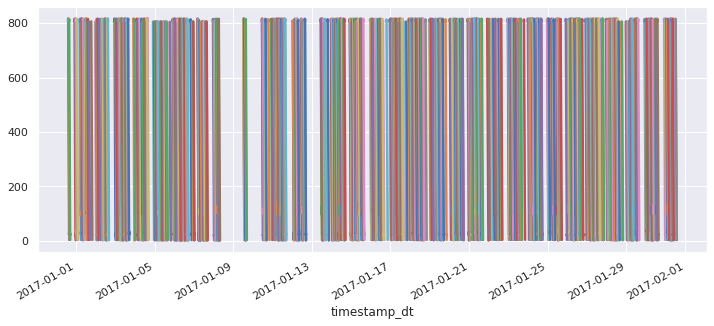

In [48]:
data.groupby('flight_id')['displacement_to_hkg'].plot(lw=2.5, figsize=(12,5))

In [38]:
df_twn_hkg_flights.isnull().sum()[df_twn_hkg_flights.isnull().sum() > 0]

aircraft_model               1038
aircraft_registration        1038
airline                      1038
scheduled_departure_utc      5766
scheduled_arrival_utc        5766
estimated_arrival_utc      167191
scheduled_departure_dt       5766
scheduled_arrival_dt         5766
weather_codes              147141
prev_latitude                   3
prev_longitude                  3
dtype: int64

In [39]:
df_twn_hkg_flights.dtypes

flight_id                                        object
timestamp_utc                                     int64
latitude                                        float64
longitude                                       float64
altitude                                          int64
heading                                           int64
speed                                             int64
flight_callsign                                  object
aircraft_model                                   object
aircraft_registration                            object
airline                                          object
origin                                           object
destination                                      object
scheduled_departure_utc                         float64
scheduled_arrival_utc                           float64
real_departure_utc                              float64
estimated_arrival_utc                           float64
real_flight_duration                            

## Feature Engineering

In [40]:
df_twn_hkg_flights['minutes_since_real_departure_interval'].value_counts().sort_index()

0 <= min <= 10      29067
10 < min <= 20       8202
100 < min <= 110     3880
110 < min <= 120      328
20 < min <=30        8881
30 < min <= 40       7532
40 < min <= 50       8446
50 < min <= 60       8480
60 < min <= 70      14669
70 < min <= 80      34607
80 < min <= 90      32189
90 < min <= 100     15485
Name: minutes_since_real_departure_interval, dtype: int64

In [41]:
df_for_modeling = df_twn_hkg_flights.groupby(['flight_id', 'minutes_since_real_departure_interval']).agg(
    time_since_real_departure=('time_since_real_departure', max),
    mean_speed=('speed', np.mean),
    std_dev_speed=('speed', np.std)).reset_index()

df_for_modeling.head()

,flight_id,minutes_since_real_departure_interval,time_since_real_departure,mean_speed,std_dev_speed
0,c0aabc0,0 <= min <= 10,583.0,266.609756,78.348541
1,c0aabc0,10 < min <= 20,1196.0,437.400000,8.221922
2,c0aabc0,20 < min <=30,1781.0,432.444444,1.236033
3,c0aabc0,30 < min <= 40,2358.0,431.666667,1.732051
4,c0aabc0,40 < min <= 50,2964.0,437.214286,2.044827


In [42]:
df_combined = pd.merge(df_for_modeling,
                      df_twn_hkg_flights,
                      on=['flight_id', 'minutes_since_real_departure_interval', 
                          'time_since_real_departure'])

df_combined.head()

,flight_id,minutes_since_real_departure_interval,time_since_real_departure,mean_speed,std_dev_speed,timestamp_utc,latitude,longitude,altitude,heading,speed,flight_callsign,aircraft_model,aircraft_registration,airline,origin,destination,scheduled_departure_utc,scheduled_arrival_utc,real_departure_utc,estimated_arrival_utc,real_flight_duration,scheduled_departure_dt,scheduled_arrival_dt,real_departure_dt,estimated_arrival_dt,route,scheduled_flight_duration,forecasted_arrival_dt,forecasted_arrival_dt_nearest_hr,...,wind_dir,wind_speed,altimeter_pressure,visibility,gust_speed,sky_level_1_coverage,sky_level_1_altitude,weather_codes,apparent_temp,weather_codes_+SHRA,weather_codes_+TSRA,weather_codes_-BR,weather_codes_-DZ,weather_codes_-RA,weather_codes_-SHRA,weather_codes_BR,weather_codes_DZ,weather_codes_HZ,weather_codes_RA,weather_codes_SHRA,weather_codes_TSRA,weather_codes_VCTS,speed_interval,prev_latitude,prev_longitude,calculated_flight_duration,calculated_time_before_arrival,displacement_to_hkg,displacement_fr_twn,timestamp_dt
0,c0aabc0,0 <= min <= 10,583.0,266.609756,78.348541,1483195308,24.916599,120.714203,25725,225,432,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,2016-12-31 15:49:48,Taiwan Taoyuan International Airport -> Hong K...,5400.0,2016-12-31 15:49:48,2016-12-31 15:00:00,...,110,10.0,30.18,6.21,0,FEW,2500.0,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400 < speed <= 500,25.004745,120.811821,5115.0,4532.0,750.539171,53.937310,2016-12-31 14:41:48
1,c0aabc0,10 < min <= 20,1196.0,437.400000,8.221922,1483195921,24.045250,119.740303,38000,225,430,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,2016-12-31 15:49:48,Taiwan Taoyuan International Airport -> Hong K...,5400.0,2016-12-31 15:49:48,2016-12-31 15:00:00,...,110,10.0,30.18,6.21,0,FEW,2500.0,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400 < speed <= 500,24.136030,119.841408,5115.0,3919.0,625.606802,188.339027,2016-12-31 14:52:01
2,c0aabc0,20 < min <=30,1781.0,432.444444,1.236033,1483196506,23.224211,118.834839,38000,225,434,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,2016-12-31 15:49:48,Taiwan Taoyuan International Airport -> Hong K...,5400.0,2016-12-31 15:49:48,2016-12-31 15:00:00,...,110,10.0,30.18,6.21,0,FEW,2500.0,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400 < speed <= 500,23.318529,118.937943,5115.0,3334.0,514.244163,317.562958,2016-12-31 15:01:46
3,c0aabc0,30 < min <= 40,2358.0,431.666667,1.732051,1483197083,22.537901,117.843002,38000,237,431,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,2016-12-31 15:49:48,Taiwan Taoyuan International Airport -> Hong K...,5400.0,2016-12-31 15:49:48,2016-12-31 15:00:00,...,110,10.0,30.18,6.21,0,FEW,2500.0,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400 < speed <= 500,22.611099,117.966003,5115.0,2757.0,404.190118,444.406110,2016-12-31 15:11:23
4,c0aabc0,40 < min <= 50,2964.0,437.214286,2.044827,1483197689,22.315187,116.577507,31625,268,440,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,2016-12-31 15:49:48,Taiwan Taoyuan International Airport -> Hong K...,5400.0,2016-12-31 15:49:48,2016-12-31 15

In [8]:
df_first_10_min = df_combined[df_combined['minutes_since_real_departure_interval'] == '0 <= min <= 10']

max flight time since departure in 10 min interval

In [9]:
df_first_10_min['time_since_real_departure'].max()

600.0

In [10]:
df_first_10_min['average_velocity'] = df_first_10_min['displacement_fr_twn'] / df_first_10_min['time_since_real_departure']

**Correlation of numerical variables**

In [11]:
df_first_10_min.dtypes

flight_id                                        object
minutes_since_real_departure_interval            object
time_since_real_departure                       float64
mean_speed                                      float64
std_dev_speed                                   float64
timestamp_utc                                     int64
latitude                                        float64
longitude                                       float64
altitude                                          int64
heading                                           int64
speed                                             int64
flight_callsign                                  object
aircraft_model                                   object
aircraft_registration                            object
airline                                          object
origin                                           object
destination                                      object
scheduled_departure_utc                         

In [12]:
# sky_level_1_coverage NEEDS TO BE DUMMY CONVERTED

In [13]:
target_var = 'calculated_time_before_arrival'

In [14]:
numeric_features = ['time_since_real_departure', 'latitude', 'longitude',
                    'altitude', 'heading', 'speed',
                    'prev_latitude', 'prev_longitude', 
                    'displacement_to_hkg', 'displacement_fr_twn',
                    'average_velocity', 'mean_speed', 'std_dev_speed',
                    'arrivals',
                    'air_temp', 'dewpoint_temp', 'rel_humidity',
                    'wind_dir', 'wind_speed', 'altimeter_pressure',
                    'visibility', 'gust_speed', 'sky_level_1_altitude',
                    'displacement_to_hkg', 'displacement_fr_twn', 'average_velocity']

# air_temp                                        float64
# dewpoint_temp                                   float64
# rel_humidity                                    float64
# wind_dir                                          int64
# wind_speed                                      float64
# altimeter_pressure                              float64
# visibility                                      float64
# gust_speed                                        int64
# sky_level_1_altitude                            float64
# displacement_to_hkg                             float64
# displacement_fr_twn                             float64
# average_velocity                                float64

In [15]:
# numeric_features = df_first_10_min.dtypes[(df_first_10_min.dtypes == np.int)|
#                                           (df_first_10_min.dtypes == np.float)].index.tolist()
# numeric_features.remove('calculated_time_before_arrival')

In [16]:
nominal_features = [
    'flight_callsign', 
    'aircraft_registration',
    'aircraft_model', 
    'airline'
]

In [17]:
corr = df_first_10_min[numeric_features + [target_var]].corr()[target_var]
corr.sort_values()

average_velocity                 -0.382646
average_velocity                 -0.382646
displacement_fr_twn              -0.371233
displacement_fr_twn              -0.371233
dewpoint_temp                    -0.361136
speed                            -0.296617
rel_humidity                     -0.265392
mean_speed                       -0.235333
std_dev_speed                    -0.200579
air_temp                         -0.170988
altitude                         -0.037122
time_since_real_departure        -0.021881
heading                           0.020464
sky_level_1_altitude              0.026482
visibility                        0.027085
wind_speed                        0.066759
wind_dir                          0.130323
altimeter_pressure                0.263691
prev_latitude                     0.337479
latitude                          0.346888
prev_longitude                    0.358359
displacement_to_hkg               0.371192
displacement_to_hkg               0.371192
longitude  

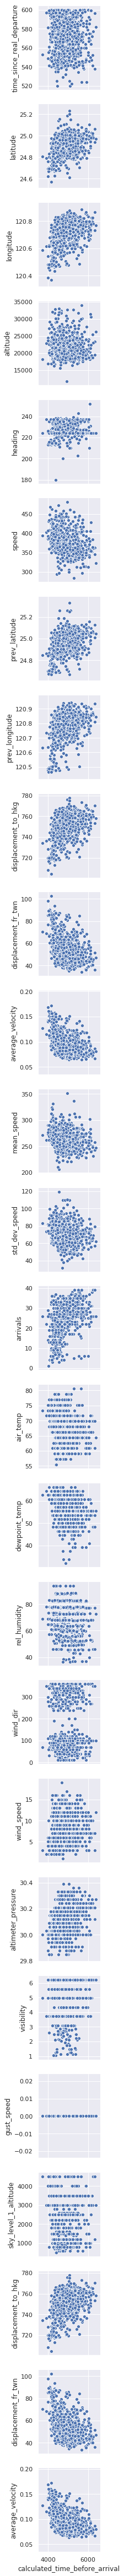

In [18]:
sns.pairplot(df_first_10_min, y_vars=numeric_features, x_vars=[target_var])

In [19]:
# # Set the default matplotlib figure size to 7x7:
# fix, ax = plt.subplots(figsize=(7,7))

# # Generate a mask for the upper triangle (taken from seaborn example gallery)
# mask = np.zeros_like(wine_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Plot the heatmap with seaborn.
# # Assign the matplotlib axis the function returns. This will let us resize the labels.
# ax = sns.heatmap(wine_corr, mask=mask, ax=ax)

# # Resize the labels.
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
# plt.show()

**ANOVA of categorical (nominal) variables**

In [20]:
df_minus_cat_nan = df_first_10_min.dropna(subset=nominal_features)

In [21]:
df_cat_features = df_minus_cat_nan[nominal_features]

In [22]:
f_values, p_values = f_classif(df_cat_features.apply(LabelEncoder().fit_transform), 
                               df_minus_cat_nan[target_var])

p_values

array([0.15405596, 0.20449775, 0.71426955, 0.07139271])

In [23]:
df_minus_cat_nan.iloc[:, np.where(p_values < 0.05)[0]].columns.tolist()

[]

In [24]:
selected_features = [
    'latitude', 'longitude', 
    'altitude', 
#     'heading', 
    'speed',
#     'flight_callsign', 
#     'aircraft_registration', 
#     'aircraft_model', 
#     'airline', 
#     'average_velocity',
    'displacement_to_hkg',
    'mean_speed',
    'std_dev_speed'
]

# selected_features = ['time_since_real_departure', 'latitude', 'longitude',
#                     'altitude', 'heading', 'speed',
#                     'prev_latitude', 'prev_longitude', 
#                     'displacement_to_hkg', 'displacement_fr_twn',
#                     'average_velocity']

selected_features = ['time_since_real_departure', 'latitude', 'longitude',
                    'altitude', 'heading', 'speed',
                    'prev_latitude', 'prev_longitude', 
                    'displacement_to_hkg', 'displacement_fr_twn',
                    'average_velocity', 'mean_speed', 'std_dev_speed',
                    'arrivals',
                    'air_temp', 'dewpoint_temp', 'rel_humidity',
                    'wind_dir', 'wind_speed', 'altimeter_pressure',
                    'visibility', 'gust_speed', 'sky_level_1_altitude',
                    'displacement_to_hkg', 'displacement_fr_twn', 'average_velocity']

nominal_features = [
#     'flight_callsign', 
#     'aircraft_registration',
#     'aircraft_model', 
#     'airline'
]

df_first_10_min[selected_features].head()

,time_since_real_departure,latitude,longitude,altitude,heading,speed,prev_latitude,prev_longitude,displacement_to_hkg,displacement_fr_twn,average_velocity,mean_speed,std_dev_speed,arrivals,air_temp,dewpoint_temp,rel_humidity,wind_dir,wind_speed,altimeter_pressure,visibility,gust_speed,sky_level_1_altitude,displacement_to_hkg,displacement_fr_twn,average_velocity
0,583.0,24.916599,120.714203,25725,225,432,25.004745,120.811821,750.539171,53.937310,0.092517,266.609756,78.348541,6,66.2,59.0,77.60,110,10.0,30.18,6.21,0,2500.0,750.539171,53.937310,0.092517
9,597.0,24.826960,120.651390,23325,233,380,24.892410,120.747681,741.040660,63.586828,0.106511,267.387097,81.467244,15,68.0,59.0,72.92,110,9.0,30.21,6.21,0,2200.0,741.040660,63.586828,0.106511
18,571.0,24.768000,120.561401,31775,232,442,24.846600,120.670898,730.224060,74.637064,0.130713,293.214286,94.166660,7,68.0,59.0,72.92,110,10.0,30.21,6.21,0,1800.0,730.224060,74.637064,0.130713
27,551.0,24.842043,120.699791,20275,237,385,24.900280,120.798721,746.202107,58.459735,0.106098,261.951220,79.751474,10,68.0,57.2,68.35,90,12.0,30.18,6.21,0,2000.0,746.202107,58.459735,0.106098
36,597.0,24.949219,120.742851,16750,224,376,24.987625,120.784050,754.553080,50.094154,0.083910,285.216216,62.809295,10,68.0,57.2,68.35,80,11.0,30.18,6.21,0,2200.0,754.553080,50.094154,0.083910


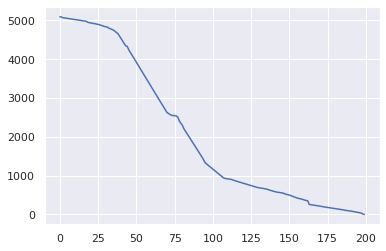

In [26]:
df_twn_hkg_flights.loc[df_twn_hkg_flights['flight_id'] == 'c0aabc0', 'calculated_time_before_arrival'].plot()

## Modeling

In [27]:
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return (1 - (numerator / denominator))

def get_regression_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
#     msle = metrics.mean_squared_log_error(y_true, y_pred)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
#     print('Mean squared log error  = ', msle)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)
    
    return {
        'mse': mse,
        'rmse': rmse,
#         'msle': msle,
        'mae': mae,
        'r2': r2,
        'r2_adjusted': r2a
    }

In [28]:
# Train data

# mask = df_twn_hkg_flights['time_since_real_departure'] <= (40*60)
# df_for_modeling = df_twn_hkg_flights[mask].copy()
X = df_first_10_min[selected_features].copy()
y = df_first_10_min['calculated_time_before_arrival'].copy()

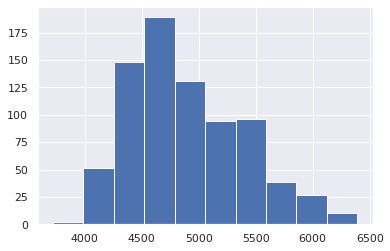

In [29]:
y.hist()

In [30]:
X = pd.get_dummies(X, columns=nominal_features, drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

### Linear Regression

In [32]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# X_train.columns

In [34]:
# plt.figure(figsize=(12,10))
# plt.barh(X_train.columns, linreg.coef_)

In [35]:
y_train_pred = linreg.predict(X_train)

train_regression_metrics = get_regression_metrics(y_train, y_train_pred, X_train.shape[1])

Mean squared error      =  157270.21224475413
Root mean squared error =  396.573085628304
Median absolute error   =  264.40612468495965
R^2                     =  0.35583900709502814
Adjusted R^2            =  0.3280181004247137


In [36]:
X_test.shape

(158, 26)

In [37]:
y_test_pred = linreg.predict(X_test)

test_regression_metrics = get_regression_metrics(y_test, y_test_pred, X_test.shape[1])

df_test_true_pred = pd.DataFrame(columns=['true', 'pred'])
df_test_true_pred = df_test_true_pred.assign(true=y_test)
df_test_true_pred = df_test_true_pred.assign(pred=y_test_pred)
df_test_true_pred['diff'] = df_test_true_pred['true'] - df_test_true_pred['pred']

Mean squared error      =  159375.2880341621
Root mean squared error =  399.21834631459774
Median absolute error   =  255.9506596084684
R^2                     =  0.3815547769648262
Adjusted R^2            =  0.2588099235379978


In [38]:
df_test_true_pred.shape

(158, 3)

In [39]:
df_test_true_pred[df_test_true_pred['diff'] < 0].shape # if true < pred => earlier than expected

(94, 3)

In [40]:
# df_test_true_pred[df_test_true_pred.pred < 0].shape

In [41]:
sorted(list(zip(X_test.columns, abs(linreg.coef_))), 
    key=lambda item:item[1],
      reverse=True)

[('longitude', 177366.93285130052),
 ('latitude', 78342.08534882158),
 ('average_velocity', 11534.189163921537),
 ('average_velocity', 11534.189163053237),
 ('prev_latitude', 1894.433086257828),
 ('prev_longitude', 1636.4832151779326),
 ('displacement_to_hkg', 911.8273613700519),
 ('displacement_to_hkg', 911.827359826163),
 ('displacement_fr_twn', 64.43775199960675),
 ('displacement_fr_twn', 64.43775019036127),
 ('dewpoint_temp', 29.19250325789425),
 ('arrivals', 19.939898750760683),
 ('wind_speed', 12.423401656565538),
 ('altimeter_pressure', 12.386204736335847),
 ('visibility', 9.90569849698541),
 ('air_temp', 9.873443663632015),
 ('heading', 7.623944853642433),
 ('time_since_real_departure', 4.700936424319503),
 ('speed', 3.9109657016334856),
 ('rel_humidity', 2.0225819982073463),
 ('mean_speed', 1.598852871108468),
 ('std_dev_speed', 1.4773305779490151),
 ('wind_dir', 0.03319457905718082),
 ('altitude', 0.019479433268511474),
 ('sky_level_1_altitude', 0.01313320673762064),
 ('gust_

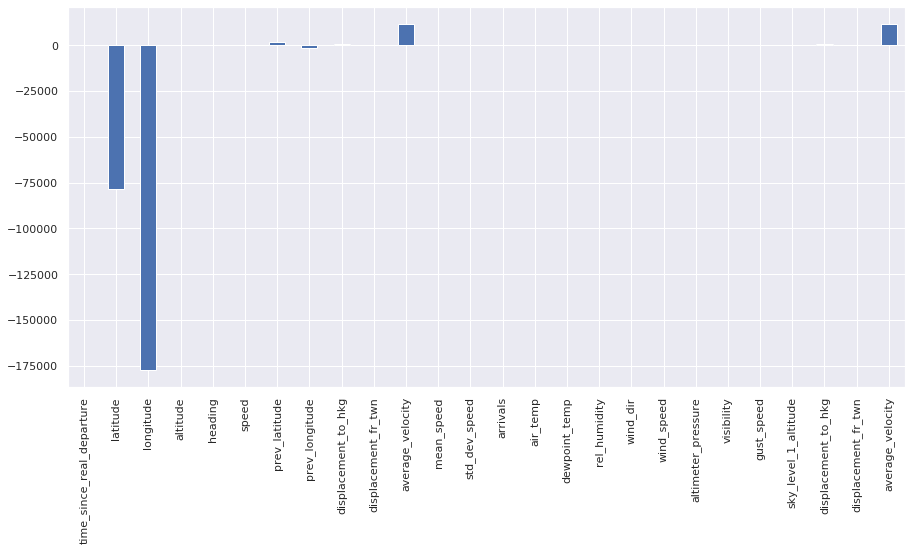

In [42]:
pd.Series(linreg.coef_, index=X_test.columns).plot.bar(figsize=(15, 7))

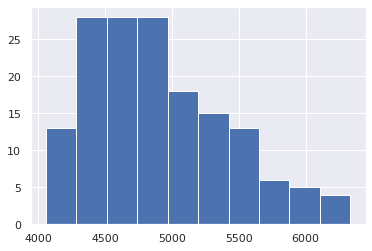

In [43]:
df_test_true_pred.true.hist()

In [44]:
def regression_diagnostic_plots(df_true_pred):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.ravel()
    
    
    # Residual Plot: Validating the assumption of linearity
    sns.residplot('pred', 'true', data=df_true_pred,lowess=True,
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1}, 
                  ax=axes[0])
    axes[0].set_title('Residual Plot')
    axes[0].set_ylabel('Residuals')
    axes[0].set_xlabel('Fitted Values')
    
    residuals = df_true_pred['true'] - df_true_pred['pred']
    
    # Normal Q-Q Plot: Validating the assumption of normally distributed residuals (errors)
    stats.probplot(residuals, dist='norm', plot=axes[1])
    axes[1].set_title('Normal Q-Q Plot')
    
    
    # Scale-Location plot: Validating the assumption of homoscedasticity of residuals
    model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

    sns.regplot(df_true_pred['pred'], model_norm_residuals_abs_sqrt,
                scatter=True,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, 
                ax=axes[2])
    axes[2].set_title("Scale-Location Plot")
    axes[2].set_ylabel("Standarized Residuals")
    axes[2].set_xlabel("Fitted Values")
    
    axes[3].axis('off')
    
    fig.tight_layout()

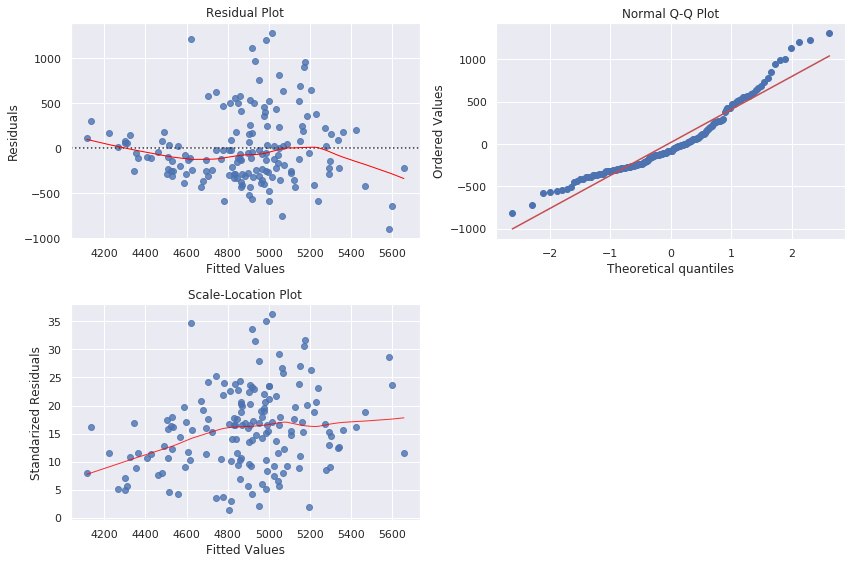

In [45]:
regression_diagnostic_plots(df_test_true_pred)

**Standardization of features**

In [46]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [47]:
r_alphas = np.logspace(0, 5, 200)
ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train_sc, y_train)

y_test_pred = ridge_model.predict(X_test_sc)

test_regression_metrics = get_regression_metrics(y_test, y_test_pred, X_test.shape[1])
df_test_true_pred = pd.DataFrame(columns=['true', 'pred'])
df_test_true_pred = df_test_true_pred.assign(true=y_test)
df_test_true_pred = df_test_true_pred.assign(pred=y_test_pred)
df_test_true_pred['diff'] = df_test_true_pred['true'] - df_test_true_pred['pred']

Mean squared error      =  160821.23147001694
Root mean squared error =  401.02522547841915
Median absolute error   =  262.32219631428825
R^2                     =  0.3759438894695716
Adjusted R^2            =  0.252085424784143


In [48]:
df_test_regression_metrics = pd.DataFrame()
df_test_true_pred = pd.DataFrame(columns=['model_name', 'true', 'pred'])

In [49]:
def gridsearch_model_evaluation(model_name, model, hyper_param):
    clf_pipe = Pipeline([
        ('reg', model)
    ])
#   
    print(clf_pipe.get_params().keys())
    gs = GridSearchCV(clf_pipe, 
                      param_grid=hyper_param, 
#                       cv=cv, 
                      verbose=10, n_jobs=-1)
    gs.fit(X_train_sc, y_train)
    
    print(model_name)
    print('Best Score: {}'.format(gs.best_score_))
    print('Best Params: {}'.format(gs.best_params_))
    
    # Best Model
    grid_model = gs.best_estimator_
    
    print('Model Score on X_train: {}'.format(grid_model.score(X_train_sc, y_train)))
    
    # Prediction and score
    y_test_pred = grid_model.predict(X_test_sc)

    test_regression_metrics = get_regression_metrics(y_test, y_test_pred, X_test.shape[1])
    test_regression_metrics['model_name'] = model_name
    

    test_regression_metrics = get_regression_metrics(y_test, y_test_pred, X_test.shape[1])

    df_test_true_pred = pd.DataFrame(columns=['true', 'pred'])
    df_test_true_pred = df_test_true_pred.assign(true=y_test)
    df_test_true_pred = df_test_true_pred.assign(pred=y_test_pred)
    df_test_true_pred['diff'] = df_test_true_pred['true'] - df_test_true_pred['pred']
    regression_diagnostic_plots(df_test_true_pred)
    
    return test_regression_metrics, y_test_pred

## Ridge Regression

dict_keys(['memory', 'steps', 'verbose', 'reg', 'reg__alpha', 'reg__copy_X', 'reg__fit_intercept', 'reg__max_iter', 'reg__normalize', 'reg__random_state', 'reg__solver', 'reg__tol'])
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1834s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0829s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1217s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1

Ridge Regression
Best Score: 0.3157228493912871
Best Params: {'reg__alpha': 60.80224261649424}
Model Score on X_train: 0.34985744472803737
Mean squared error      =  160791.14312179902
Root mean squared error =  400.98770943982686
Median absolute error   =  261.904560431085
R^2                     =  0.37606064530702865
Adjusted R^2            =  0.2522253535359046
Mean squared error      =  160791.14312179902
Root mean squared error =  400.98770943982686
Median absolute error   =  261.904560431085
R^2                     =  0.37606064530702865
Adjusted R^2            =  0.2522253535359046


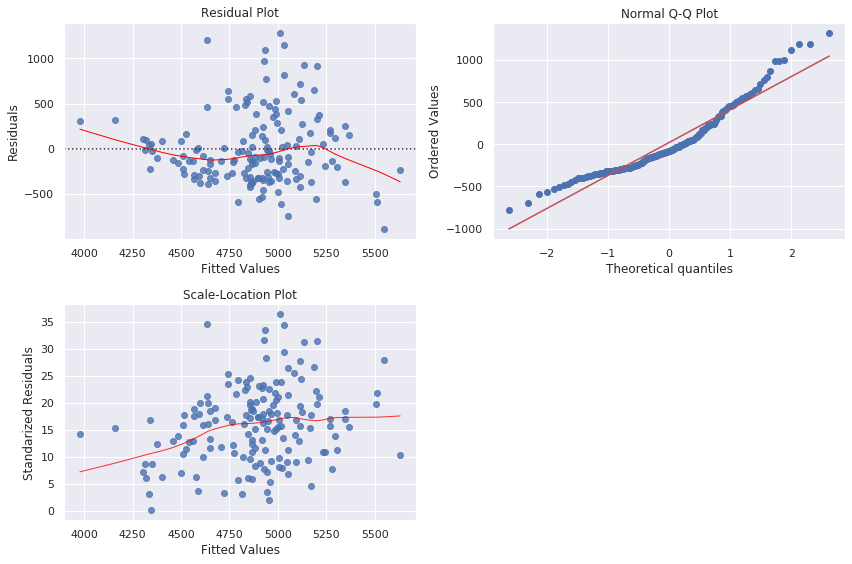

In [50]:
test_regression_metrics, y_test_pred = gridsearch_model_evaluation('Ridge Regression',
                                                                    Ridge(),
                                                                    {'reg__alpha': np.logspace(0, 5, 200)})

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

## Lasso Regression

dict_keys(['memory', 'steps', 'verbose', 'reg', 'reg__alpha', 'reg__copy_X', 'reg__fit_intercept', 'reg__max_iter', 'reg__normalize', 'reg__positive', 'reg__precompute', 'reg__random_state', 'reg__selection', 'reg__tol', 'reg__warm_start'])
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0229s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1256s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1230s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished


Lasso Regression
Best Score: 0.3052035543408783
Best Params: {'reg__alpha': 0.1485}
Model Score on X_train: 0.35314276060617245
Mean squared error      =  161407.9873446659
Root mean squared error =  401.75612919365136
Median absolute error   =  263.3458750190821
R^2                     =  0.37366702225734294
Adjusted R^2            =  0.24935666026261705
Mean squared error      =  161407.9873446659
Root mean squared error =  401.75612919365136
Median absolute error   =  263.3458750190821
R^2                     =  0.37366702225734294
Adjusted R^2            =  0.24935666026261705


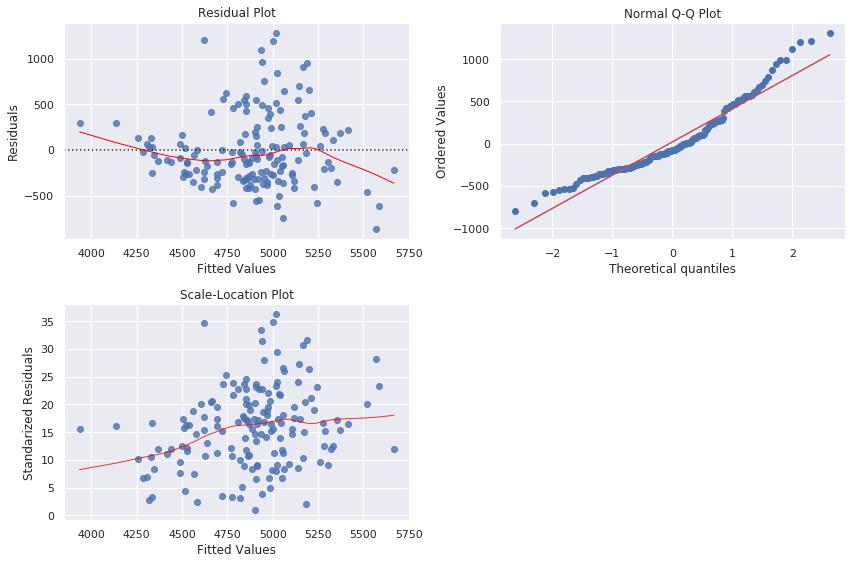

In [51]:
test_regression_metrics, y_test_pred = gridsearch_model_evaluation('Lasso Regression',
                                                                    Lasso(),
                                                                    {'reg__alpha': np.arange(0.001, 0.15, 0.0025)}
                                                                   )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

## ElasticNet Regression

dict_keys(['memory', 'steps', 'verbose', 'reg', 'reg__alpha', 'reg__copy_X', 'reg__fit_intercept', 'reg__l1_ratio', 'reg__max_iter', 'reg__normalize', 'reg__positive', 'reg__precompute', 'reg__random_state', 'reg__selection', 'reg__tol', 'reg__warm_start'])
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0119s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0895s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1074s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1394s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 368 

ElasticNet Regression
Best Score: 0.31322613139371835
Best Params: {'reg__alpha': 0.5, 'reg__l1_ratio': 0.5}
Model Score on X_train: 0.34208103736994533
Mean squared error      =  161817.79932600792
Root mean squared error =  402.2658316660861
Median absolute error   =  261.0111372953256
R^2                     =  0.3720767740743923
Adjusted R^2            =  0.24745079030289752
Mean squared error      =  161817.79932600792
Root mean squared error =  402.2658316660861
Median absolute error   =  261.0111372953256
R^2                     =  0.3720767740743923
Adjusted R^2            =  0.24745079030289752


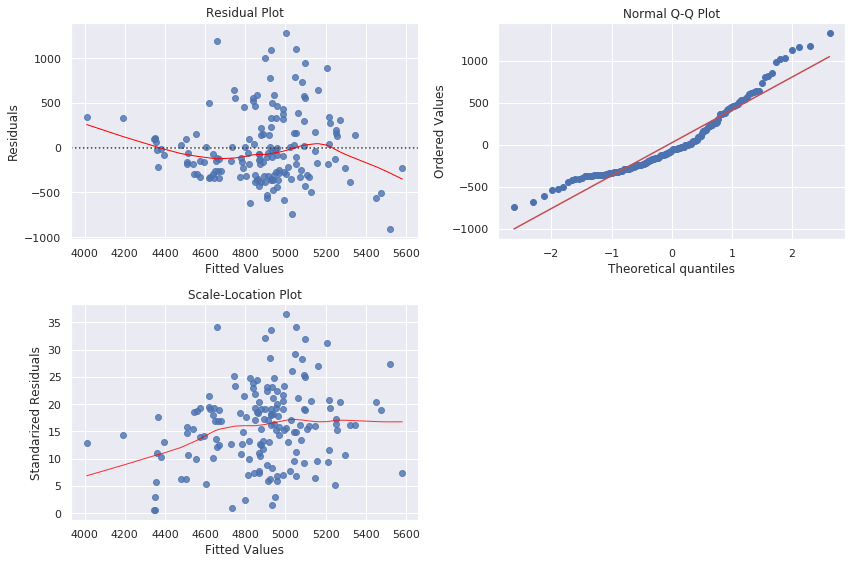

In [52]:
test_regression_metrics, y_test_pred = gridsearch_model_evaluation('ElasticNet Regression',
                                                                    ElasticNet(),
                                                                    {'reg__alpha': np.arange(0.5, 1.0, 0.005),
                                                                     'reg__l1_ratio': [0.5]}
                                                                   )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

## Random Forest Regression

dict_keys(['memory', 'steps', 'verbose', 'reg', 'reg__bootstrap', 'reg__ccp_alpha', 'reg__criterion', 'reg__max_depth', 'reg__max_features', 'reg__max_leaf_nodes', 'reg__max_samples', 'reg__min_impurity_decrease', 'reg__min_impurity_split', 'reg__min_samples_leaf', 'reg__min_samples_split', 'reg__min_weight_fraction_leaf', 'reg__n_estimators', 'reg__n_jobs', 'reg__oob_score', 'reg__random_state', 'reg__verbose', 'reg__warm_start'])
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0856s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  84 out of 120 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 110 out of 120 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.6s finished


Random Forest Regression
Best Score: 0.3933972109102991
Best Params: {'reg__max_depth': 6, 'reg__n_estimators': 40}
Model Score on X_train: 0.6935858929014915
Mean squared error      =  133894.52608720268
Root mean squared error =  365.91600960767306
Median absolute error   =  231.38733826801626
R^2                     =  0.4804311818314053
Adjusted R^2            =  0.3773106530345849
Mean squared error      =  133894.52608720268
Root mean squared error =  365.91600960767306
Median absolute error   =  231.38733826801626
R^2                     =  0.4804311818314053
Adjusted R^2            =  0.3773106530345849


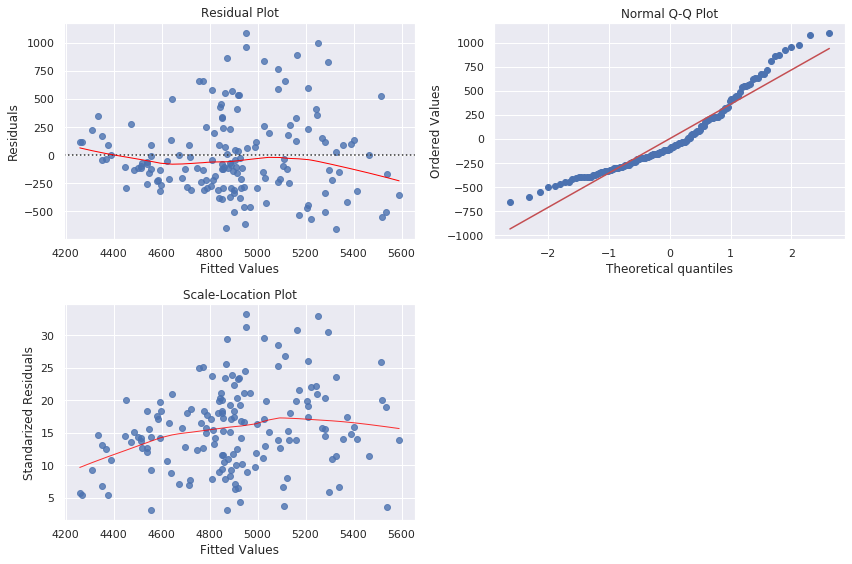

In [53]:
# https://gdcoder.com/decision-tree-regressor-explained-in-depth/
# https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb
test_regression_metrics, y_test_pred = gridsearch_model_evaluation('Random Forest Regression',
                                                                    RandomForestRegressor(),
                                                                    {'reg__max_depth': range(3,7),
                                                                     'reg__n_estimators': np.arange(10, 70, 10)}
                                                                   )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

## Support Vector Regression

dict_keys(['memory', 'steps', 'verbose', 'reg', 'reg__C', 'reg__cache_size', 'reg__coef0', 'reg__degree', 'reg__epsilon', 'reg__gamma', 'reg__kernel', 'reg__max_iter', 'reg__shrinking', 'reg__tol', 'reg__verbose'])
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0305s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1385s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  48 out of  80 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.9s finished


Support Vector Regression
Best Score: 0.29562506752810724
Best Params: {'reg__C': 100.0, 'reg__gamma': 1e-05, 'reg__kernel': 'linear'}
Model Score on X_train: 0.32755763232861435
Mean squared error      =  169691.29173415573
Root mean squared error =  411.9360286915381
Median absolute error   =  225.08093721577416
R^2                     =  0.34152420956778584
Adjusted R^2            =  0.2108343580316212
Mean squared error      =  169691.29173415573
Root mean squared error =  411.9360286915381
Median absolute error   =  225.08093721577416
R^2                     =  0.34152420956778584
Adjusted R^2            =  0.2108343580316212


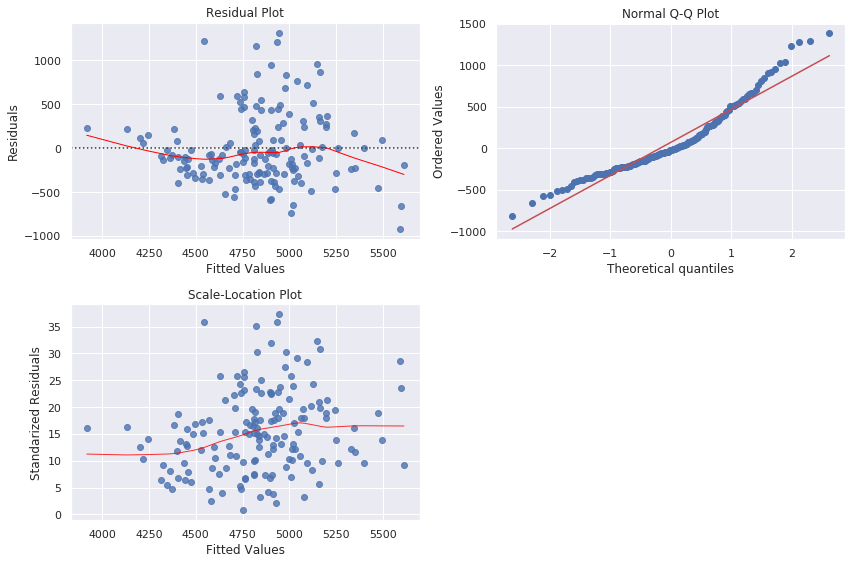

In [54]:
# https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d
# https://stackoverflow.com/questions/40568808/coefficient-in-support-vector-regression-svr-using-grid-search-gridsearchcv

test_regression_metrics, y_test_pred = gridsearch_model_evaluation('Support Vector Regression',
                                                                    SVR(),
                                                                    {'reg__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                                                                     'reg__C': np.logspace(-3, 2, 2),
                                                                     'reg__gamma': np.logspace(-5, 2, 2)}
                                                                   )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

## AdaBoost Regression

dict_keys(['memory', 'steps', 'verbose', 'reg', 'reg__base_estimator__ccp_alpha', 'reg__base_estimator__criterion', 'reg__base_estimator__max_depth', 'reg__base_estimator__max_features', 'reg__base_estimator__max_leaf_nodes', 'reg__base_estimator__min_impurity_decrease', 'reg__base_estimator__min_impurity_split', 'reg__base_estimator__min_samples_leaf', 'reg__base_estimator__min_samples_split', 'reg__base_estimator__min_weight_fraction_leaf', 'reg__base_estimator__presort', 'reg__base_estimator__random_state', 'reg__base_estimator__splitter', 'reg__base_estimator', 'reg__learning_rate', 'reg__loss', 'reg__n_estimators', 'reg__random_state'])
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0919s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 117 out of 140 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 132 out of 140 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.9s finished


AdaBoost Regression
Best Score: 0.24920653851682517
Best Params: {'reg__base_estimator__max_depth': 2, 'reg__learning_rate': 0.5, 'reg__n_estimators': 25}
Model Score on X_train: 0.32465923864347257
Mean squared error      =  171827.71284691463
Root mean squared error =  414.52106441882376
Median absolute error   =  314.41358475263587
R^2                     =  0.33323396929355964
Adjusted R^2            =  0.20089872655793017
Mean squared error      =  171827.71284691463
Root mean squared error =  414.52106441882376
Median absolute error   =  314.41358475263587
R^2                     =  0.33323396929355964
Adjusted R^2            =  0.20089872655793017


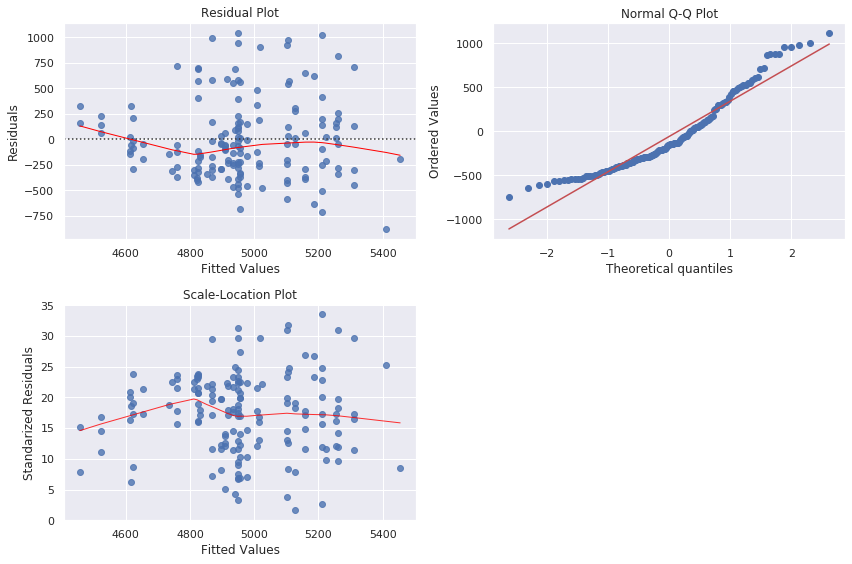

In [55]:
# https://www.programcreek.com/python/example/86712/sklearn.ensemble.AdaBoostRegressor
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor()) 
test_regression_metrics, y_test_pred = gridsearch_model_evaluation('AdaBoost Regression',
                                                                    ada,
                                                                    {'reg__n_estimators': [25, 50],
                                                                     'reg__base_estimator__max_depth': [1,2],
                                                                     'reg__learning_rate': np.arange(0.4, 1.1, 0.1)
                                                                    }
                                                                   )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

## XGBoost

dict_keys(['memory', 'steps', 'verbose', 'reg', 'reg__objective', 'reg__base_score', 'reg__booster', 'reg__colsample_bylevel', 'reg__colsample_bynode', 'reg__colsample_bytree', 'reg__gamma', 'reg__gpu_id', 'reg__importance_type', 'reg__interaction_constraints', 'reg__learning_rate', 'reg__max_delta_step', 'reg__max_depth', 'reg__min_child_weight', 'reg__missing', 'reg__monotone_constraints', 'reg__n_estimators', 'reg__n_jobs', 'reg__num_parallel_tree', 'reg__random_state', 'reg__reg_alpha', 'reg__reg_lambda', 'reg__scale_pos_weight', 'reg__subsample', 'reg__tree_method', 'reg__validate_parameters', 'reg__verbosity', 'reg__nthread', 'reg__eval_metric'])
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed: 86.9min remaining: 57.9min
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed: 91.3min remaining: 37.1min
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed: 111.7min remaining: 24.2min
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed: 119.4min remaining:  8.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 119.5min finished


[21:31:41] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regression
Best Score: 0.39491127617903393
Best Params: {'reg__colsample_bytree': 0.7, 'reg__learning_rate': 0.03, 'reg__max_depth': 7, 'reg__min_child_weight': 4, 'reg__n_estimators': 500, 'reg__subsample': 0.7}
Model Score on X_train: 0.9949777605432509
Mean squared error      =  146916.54327571995
Root mean squared error =  383.29693877687043
Median absolute error   =  219.10302734375
R^2                     =  0.4299001087657104
Adjusted R^2            =  0.3167505120321872
Mean squared error      =  146916.54327571995
Root mean squared error =  383.29693877687043
Median absolute error   =  219.10302734375
R^2                     =  0.4299001087657104
Adjusted R^2            =  0.3167505120321872


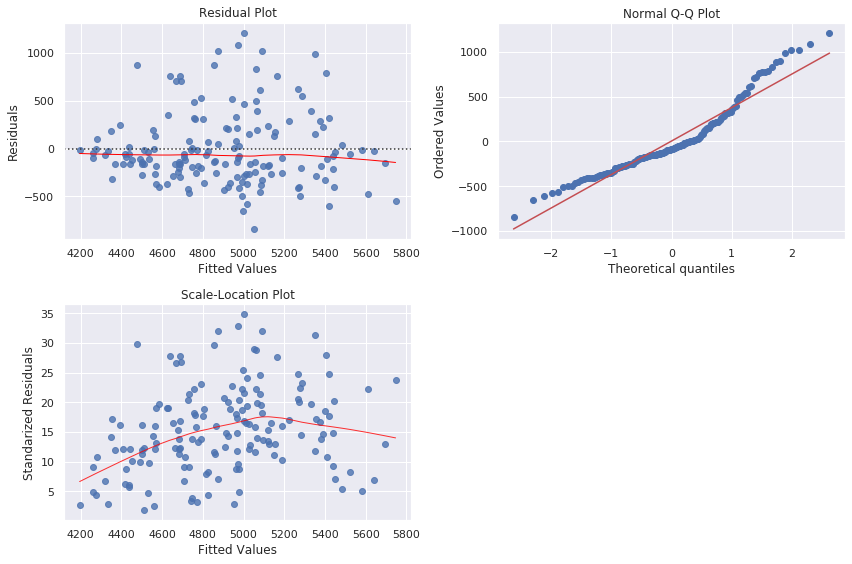

In [57]:
# https://www.datacamp.com/community/tutorials/xgboost-in-python
# https://www.kaggle.com/phunter/xgboost-with-gridsearchcv
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

test_regression_metrics, y_test_pred = gridsearch_model_evaluation('XGBoost Regression',
                                                                    XGBRegressor(
                                                                        objective='reg:linear',
                                                                        nthread=12,
                                                                        eval_metric='rmse'
                                                                    ),
                                                                    {
                                                                      'reg__learning_rate': [.03, 0.05, .07], #so called `eta` value
                                                                      'reg__max_depth': [5, 6, 7],
                                                                      'reg__min_child_weight': [4],
                                                                      'reg__subsample': [0.7],
                                                                      'reg__colsample_bytree': [0.7],
                                                                      'reg__n_estimators': [500],
#                                                                       'reg_'
                                                                    }
                                                                   )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

In [ ]:
# model_names = [
#                'Linear Regression',
#                'Ridge Regression',
#                'Lasso Regression'
# ]

# models = [
#          LinearRegression(),
#          Ridge(),
#          Lasso()
         
#         ]

# hyper_params = [
#                 {},
#                 {
#                     'clf__alpha': np.logspace(0, 5, 10)
#                 },
#                 {
#                     'clf__alpha': np.arange(0.001, 0.15, 0.0025)
#                     'clf__alpha': np.arange(0.001, 0.005, 0.0025)
#                 }
# ]

In [ ]:
# # df_test_regression_metrics = pd.DataFrame()

# for model_name, model, hyper_param in zip(model_names, models, hyper_params):
    